## Problem Statement

The e-commerce business is quite popular today. Here, we do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal. 

Suppose we are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders. As a ML Engineer, we have to build a model that will improve the recommendations given to the users given their past reviews and ratings.  

In order to do this, we need to build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

As part of this capstone project we will implement both sentiment analysis NLP model and product recommendation engine. Then we have to improve our recommendations based on the user-sentiments (in the form of reviews/ratings) of the products which can filter the best recommendations out of it.

## 1. Data Sourcing and Sentiment Analysis

In [1]:
# Import necessary packages and load the model.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  train_test_split

from imblearn.over_sampling import SMOTE

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
# Reading the reviews data and storing in a datafram

reviews_df = pd.read_csv('data/sample30.csv')
reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [3]:
# Lets check the shape of dataframe

reviews_df.shape

(30000, 15)

In [4]:
# print the column names

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
# Let's check for the columns with number of null values

reviews_df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [6]:
# Converting the null values as percentage

round(reviews_df.isnull().sum()/len(reviews_df)*100,2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

#### Data Cleaning

In [7]:
# Removing columns as these are not important for our analysis
reviews_df.drop(['reviews_userCity', 'reviews_userProvince', 'reviews_date'], axis=1, inplace=True)

# Removing records with null value of 'user-sentiment' and 'reviews_username' columns
reviews_df = reviews_df[~reviews_df['user_sentiment'].isna()]
reviews_df = reviews_df[~reviews_df['reviews_username'].isna()]

In [8]:
# Let's check the product brand for missing manufacturer 
reviews_df[reviews_df['manufacturer'].isna()]['brand'].unique()

array(['Summit Entertainment'], dtype=object)

In [9]:
# manufacturer when brand is 'Summit Entertainment'
reviews_df[reviews_df['brand']=='Summit Entertainment']['manufacturer'].unique()

array(['Summit Entertainment', nan], dtype=object)

In [10]:
# we can impute the missing value of manufacturer with 'Summit Entertainment'
reviews_df['manufacturer'].fillna('Summit Entertainment', inplace=True)

In [11]:
# Check for the columns with null values again

reviews_df.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer               0
name                       0
reviews_didPurchase    14005
reviews_doRecommend     2541
reviews_rating             0
reviews_text               0
reviews_title            189
reviews_username           0
user_sentiment             0
dtype: int64

We can combine the 'review_title' with 'review_text' column for our analysis which can overall tell about the product review. Also we can utilize 'doRecommend' and 'doRecommend' columns to improve our sentiment model. Hence we are not going to remove/impute the missing values of above columns

#### Exploratory Data Analysis

Value counts of User-Sentiment label
Positive    26579
Negative     3357
Name: user_sentiment, dtype: int64




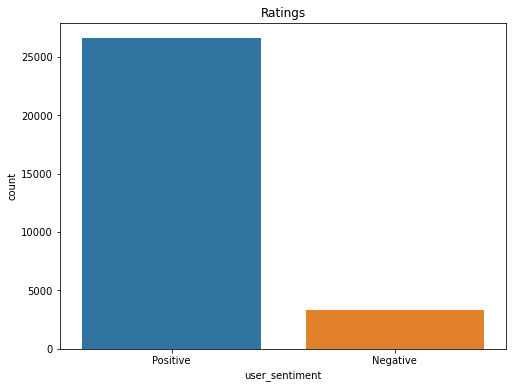

In [12]:
# Check how the given 'user_sentiment' label is distributed between positive and 'negative' sentiments

print('Value counts of User-Sentiment label')
print(reviews_df['user_sentiment'].value_counts())
print('\n')
plt.figure(figsize=(8,6))
sns.countplot(data=reviews_df, x='user_sentiment')
plt.title('Ratings')
plt.show()

Value counts of Review Rating
5    20791
4     6010
1     1373
3     1344
2      418
Name: reviews_rating, dtype: int64




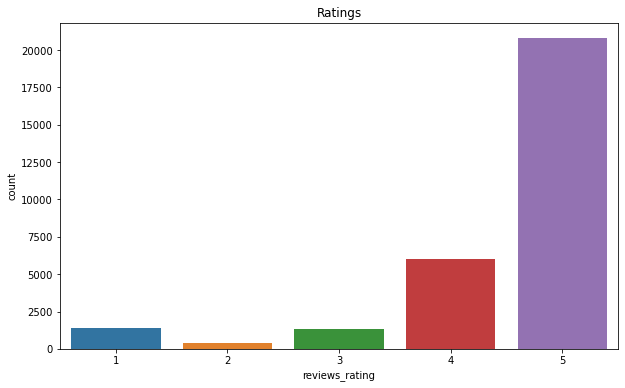

In [13]:
# Check the distribution of review-ratings in our dataframe

print('Value counts of Review Rating')
print(reviews_df['reviews_rating'].value_counts())
print('\n')
plt.figure(figsize=(10,6))
sns.countplot(data=reviews_df, x='reviews_rating')
plt.title('Ratings')
plt.show()

Ratings with User-Sentiment label
reviews_rating  user_sentiment
1               Negative            593
                Positive            780
2               Negative            140
                Positive            278
3               Negative            219
                Positive           1125
4               Negative            550
                Positive           5460
5               Negative           1855
                Positive          18936
Name: user_sentiment, dtype: int64




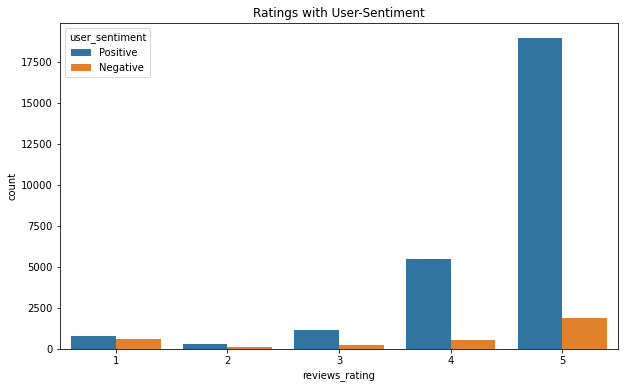

In [14]:
# Check the distribution of review-ratings based on the sentiment label

print('Ratings with User-Sentiment label')
print(reviews_df.groupby(['reviews_rating', 'user_sentiment'])['user_sentiment'].count())
print('\n')
plt.figure(figsize=(10,6))
sns.countplot(data=reviews_df, x='reviews_rating', hue='user_sentiment')
plt.title('Ratings with User-Sentiment')
plt.show()

In [15]:
# Let's check the distribution of the length of review text

reviews_df['review_length'] = reviews_df['reviews_text'].astype('str').apply(len)
reviews_df['review_length'].iplot(
                    kind='hist', bins=100, xTitle='review length', yTitle='count', title='Review Text Length Distribution')

In [16]:
# Let's check the distribution of word count of review text

reviews_df['rev_word_count'] = reviews_df['reviews_text'].apply(lambda x: len(str(x).split()))
reviews_df['rev_word_count'].iplot(
                    kind='hist', bins=100, xTitle='word count', yTitle='count', title='Review Text Word Count Distribution')

#### Text preprocessing

In [17]:
# clean the text and remove all the unnecessary elements
# 1.Make the text lowercase
# 2.Remove text in square brackets
# 3.Remove punctuation
# 4.Remove words containing numbers
# 5.Remove hyperlinks

def clean_text(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]", '', text)
    text = re.sub("[^\w\s]", '', text)
    text = re.sub("\S*\d\S*", '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    return text

In [18]:
# remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(words)

In [19]:
# lemmatize texts
def lemmatize_text(text):
    tokens = word_tokenize(text)
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized)

In [20]:
# Combine 'reviews_text' and 'reviews_title' columns for overall review which can strengthen our model

reviews_df['reviews_title'].fillna(' ', inplace=True)
reviews_df['reviews'] = reviews_df['reviews_text'] + ' ' + reviews_df['reviews_title']
reviews_df.drop(['reviews_text', 'reviews_title'], axis=1, inplace=True)
reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_length,rev_word_count,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,5,joshua,Positive,201,41,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,5,dorothy w,Positive,62,11,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,5,dorothy w,Positive,12,2,Good flavor. Good
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,rebecca,Negative,696,124,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,walker557,Negative,132,25,My husband bought this gel for us. The gel cau...


In [21]:
# Apply the text-processing on review text

reviews_df['clean_review_text'] = reviews_df['reviews'].apply(lambda x: lemmatize_text(remove_stopwords(clean_text(x))))
reviews_df[['reviews', 'clean_review_text']].head()

,reviews,clean_review_text
0,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,good flavor review collected part promotion good
2,Good flavor. Good,good flavor good
3,I read through the reviews on here before look...,read review looking buying one couple lubrican...
4,My husband bought this gel for us. The gel cau...,husband bought gel u gel caused irritation fel...


In [22]:
# Lets check the records which have XXXX in it.

reviews_df[reviews_df['clean_review_text'].str.contains('xxxx')].head(5)

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_length,rev_word_count,reviews,clean_review_text
6001,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),NaN,True,5,vicki,Positive,50,3,Action movie x-xxxxxxxxxxxxxxxxxxxxxxxxxcccccc...,action movie xxxxxxxxxxxxxxxxxxxxxxxxxxccccccc...
14184,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,False,True,5,spiderman,Positive,132,16,"xxxxxxxxx Great cleaner, cheap, easy to use,xx...",xxxxxxxxx great cleaner cheap easy usexxxxxxxx...


In [23]:
# Remove XXXX

reviews_df['clean_review_text'] = reviews_df['clean_review_text'].str.replace('xxxx','')

#### Exploratory Data Analysis on Review Text

In [24]:
# Let's take the subset of dataframe which can contain the reviews with Positive and Negative sentiments

pos_review = reviews_df[reviews_df['user_sentiment']=='Positive']
neg_review = reviews_df[reviews_df['user_sentiment']=='Negative']

In [25]:
#Using a word cloud find the top 40 words by frequency among all the reviews with positive sentiments

from wordcloud import WordCloud
WC_pos = WordCloud(max_words=40).generate(str(pos_review['clean_review_text']))
wordCloud_df_pos = pd.DataFrame(list(WC_pos.words_.items()), columns={'word', 'frequency_score'})
wordCloud_df_pos

,word,frequency_score
0,good,1.0
1,influenster,0.8
2,love,0.6
3,received,0.6
4,flavor,0.4
5,review,0.4
6,got,0.4
7,product,0.4
8,album,0.2
9,hip,0.2


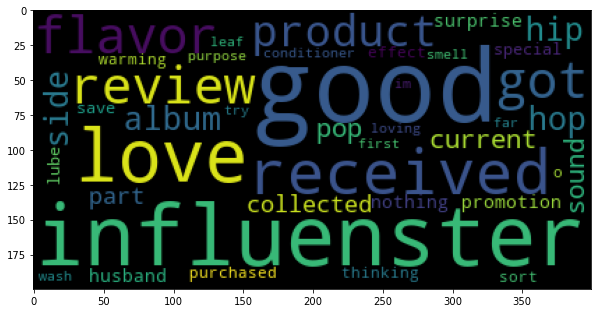

In [26]:
# Visualise the top words by frequency using word cloud

fig = plt.figure(figsize=(10,8))
WC_pos.background_color = 'Black'
plt.imshow(WC_pos)
plt.show();

In [27]:
#Using a word cloud find the top 40 words by frequency among all the reviews with negative sentiments

WC_neg = WordCloud(max_words=40).generate(str(neg_review['clean_review_text']))
wordCloud_df_neg = pd.DataFrame(list(WC_neg.words_.items()), columns={'word', 'frequency_score'})
wordCloud_df_neg

,word,frequency_score
0,bought,1.00
1,hair,1.00
2,conditioner,0.75
3,review,0.50
4,husband,0.50
5,gel,0.50
6,product,0.50
7,read,0.25
8,looking,0.25
9,buying,0.25


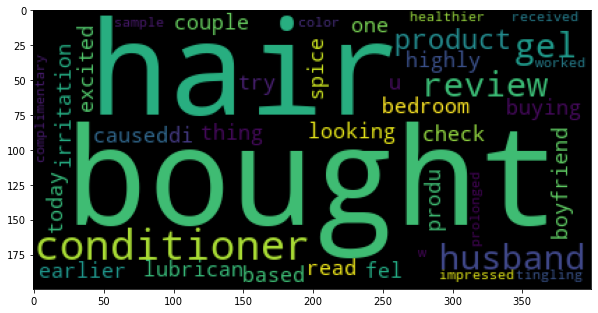

In [28]:
# Visualise the top words by frequency using word cloud

fig = plt.figure(figsize=(10,8))
WC_neg.background_color = 'Black'
plt.imshow(WC_neg)
plt.show();

AS we have seen from the dataset that for some of the products, however the rating is 1 or 2, doRecommend is False and high level review text is negative but still the sentiment label is given as 'Positive' and vice-versa. Let's make sentiment label from reviews rating i.e. if greater than 3 then positive else negative

In [29]:
# Make the sentiment label based on the rating

reviews_df['sentiment'] = reviews_df['reviews_rating'].map(lambda x:1 if x>3 else 0)

#### Feature extraction

In [30]:
# Converting the clean & processed review text to features using Tf-idf

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(reviews_df['clean_review_text'])
y = reviews_df['sentiment']

In [31]:
print(X.shape)
print(y.shape)

(29936, 9492)
(29936,)


In [32]:
# Saving the vectorizer so that it can be used later while deploying the model

import pickle
model_filename = 'tf_idf_vect.pkl'

with open('models/'+model_filename, 'wb') as f:
    pickle.dump(tfidf_vectorizer, f, pickle.HIGHEST_PROTOCOL)

##### Handling class imbalance using SMOTE

In [33]:
# Value counts of original dataset

y.value_counts()

1    26801
0     3135
Name: sentiment, dtype: int64

As we can see the class is highly imbalanced i.e.the positive classes are more than the negative classes. We need to handle this class imbalance problem, we can use SMOTE technique to achieve class imbalance

In [34]:
# SMOTE technique to handle class imbalance

smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X,y)

In [35]:
# Value counts after oversampling
y_os.value_counts()

1    26801
0    26801
Name: sentiment, dtype: int64

In [36]:
# Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.30, random_state=101)

#### Text Classification Model

#### Logistic Regression

In [37]:
# Let's Start with Logistic Regression First

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [38]:
# Logistic Regression model with grid search cross validation technique to get the best parameters and best performance score

lr = LogisticRegression()

lr_params = {
                'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10],
                'penalty': ['l1', 'l2'],
                'solver': ['newton-cg', 'liblinear', 'sag']
            }

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

lr_grid_search = GridSearchCV(estimator=lr,
                             param_grid=lr_params,
                             cv=folds,
                             verbose=1,
                             n_jobs=-1)

lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'sag']},
             verbose=1)

In [39]:
# The best model parameters and best score

print("best parameters- {}".format(lr_grid_search.best_params_))
print("best score- {}".format(lr_grid_search.best_score_))

best parameters- {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best score- 0.9316916014767695


In [40]:
# Predict the model using test data and find accuracy

logreg = LogisticRegression(C=10, solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred_lb = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [41]:
# Confusion matrix and classification report

print(confusion_matrix(y_test, y_pred_lb))
print('\n')
print(classification_report(y_test, y_pred_lb))

[[7773  193]
 [ 733 7382]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7966
           1       0.97      0.91      0.94      8115

    accuracy                           0.94     16081
   macro avg       0.94      0.94      0.94     16081
weighted avg       0.94      0.94      0.94     16081



#### Random Forest

In [42]:
# Lets Try with Random Forest

from sklearn.ensemble import RandomForestClassifier

In [43]:
# Random Forest model with grid search cross validation technique to get the best parameters and best performance score

rf = RandomForestClassifier()

rf_param = {
            'min_samples_split': [1,2,5],
            'min_samples_leaf': [1,2,5],
            'n_estimators': [50,100,150],
            'criterion': ['entropy']
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

rf_grid_search = GridSearchCV(estimator=rf,
                              param_grid=rf_param,
                              cv=folds,
                              n_jobs=-1,
                              verbose=1)

rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [44]:
# The best model parameters and best score

print("best parameters- {}".format(rf_grid_search.best_params_))
print("best score- {}".format(rf_grid_search.best_score_))

best parameters- {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
best score- 0.9609819217891695


In [45]:
# Predict the model using test data and find accuracy

rf_model = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.97


In [46]:
# Confusion matrix and classification report

print(confusion_matrix(y_test, y_pred_rf))
print('\n')
print(classification_report(y_test, y_pred_rf))

[[7822  144]
 [ 341 7774]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7966
           1       0.98      0.96      0.97      8115

    accuracy                           0.97     16081
   macro avg       0.97      0.97      0.97     16081
weighted avg       0.97      0.97      0.97     16081



#### XGBoost

In [47]:
# Lets Try with XGBoost

import xgboost as xgb

In [48]:
# XGBoost model with grid search cross validation technique to get the best parameters and best performance score

xg = xgb.XGBClassifier()

xg_param = {
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [1, 2, 4, 6],
            'min_child_weight': [1, 3],
            'n_estimators': [25, 50, 100]
        }

xg_grid_search = GridSearchCV(estimator=xg,
                              param_grid=xg_param,
                              n_jobs=-1,
                              cv=3,
                              refit=True)

xg_grid_search.fit(X_train, y_train)

[04:38:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [49]:
# The best model parameters and best score

print("best parameters- {}".format(xg_grid_search.best_params_))
print("best score- {}".format(xg_grid_search.best_score_))

best parameters- {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
best score- 0.9216971829109033


In [50]:
# Predict the model using test data and find accuracy

xgb_model = xgb.XGBClassifier(learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xg_grid_search.predict(X_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))

[04:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.93


In [51]:
# Confusion matrix and classification report

print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print(classification_report(y_test, y_pred_xgb))

[[7221  745]
 [ 423 7692]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7966
           1       0.91      0.95      0.93      8115

    accuracy                           0.93     16081
   macro avg       0.93      0.93      0.93     16081
weighted avg       0.93      0.93      0.93     16081



#### Naive Bayes Classifier

In [52]:
# Lets Try with Navie Bayes

from sklearn.naive_bayes import MultinomialNB

In [53]:
# Naive Bayes model with grid search cross validation technique to get the best parameters and best performance score

nb = MultinomialNB()

nb_param = {'alpha':[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

nb_grid_search = GridSearchCV(estimator=nb,
                              param_grid=nb_param,
                              cv=folds,
                              n_jobs=-1,
                              verbose=1)

nb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1, 5]},
             verbose=1)

In [54]:
# The best model parameters and best score

print("best parameters- {}".format(nb_grid_search.best_params_))
print("best score- {}".format(nb_grid_search.best_score_))

best parameters- {'alpha': 0.0001}
best score- 0.8961915297406561


In [55]:
# Predict the model using test data and find accuracy

nb_model = MultinomialNB(alpha=0.0001)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(nb_model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.91


In [56]:
# Confusion matrix and classification report

print(confusion_matrix(y_test, y_pred_nb))
print('\n')
print(classification_report(y_test, y_pred_nb))

[[7343  623]
 [ 894 7221]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7966
           1       0.92      0.89      0.90      8115

    accuracy                           0.91     16081
   macro avg       0.91      0.91      0.91     16081
weighted avg       0.91      0.91      0.91     16081



Since the Random-Forest model performs well with our dataset compared to all the other models. We can save the Random Forest model as pickle file which we can utilize later in inference and deployment

In [57]:
# Save the Random-Forest model which can be used later in our deployment

import pickle
model_filename = 'sentiment_analysis_rf_model.pkl'

with open('models/'+model_filename, 'wb') as f:
    pickle.dump(rf_model, f, pickle.HIGHEST_PROTOCOL)

##### Model Inference

In [58]:
# Take sample reviews

test_sample_reviews = [
                    "I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess. Disappointed",
                    "Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.",
                    "It's bubble bath.",
                    "I ma using this for my baby when she is one month old. I don't like much fragnanaces hence i love it. I don't feel like using another one.",
                    "My son loves this product. Makes bath time more fun and looks forward to it. Not only is it bubbles but also body wash. The 2- in-1 makes it convenient for me"
                    ]

In [59]:
# Preprocess sample reviews

model_infer_df = pd.DataFrame()
model_infer_df['reviews'] = test_sample_reviews

model_infer_df['clean_review'] = [lemmatize_text(remove_stopwords(clean_text(review))) for review in model_infer_df['reviews']]
test_sample_vec = tfidf_vectorizer.transform(model_infer_df['clean_review'])

In [60]:
# Load the rf-model and predict the sentiments of sample reviews

filepath = 'models/sentiment_analysis_rf_model.pkl'
load_model = pickle.load(open(filepath, 'rb'))

model_infer_df['pred_sentiment'] = load_model.predict(test_sample_vec)
model_infer_df['pred_sentiment'] = model_infer_df['pred_sentiment'].map({1:'positive', 0:'negative'})

model_infer_df

,reviews,clean_review,pred_sentiment
0,I read through the reviews on here before look...,read review looking buying one couple lubrican...,negative
1,Purchased this thinking it would have some sor...,purchased thinking would sort warming effect o...,negative
2,It's bubble bath.,bubble bath,negative
3,I ma using this for my baby when she is one mo...,using baby one month old dont like much fragna...,positive
4,My son loves this product. Makes bath time mor...,son love product make bath time fun look forwa...,positive


## 2. Building a Recommendation System

### User-based Recommendation System

In [61]:
# Let's check the reviews dataframe

reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_length,rev_word_count,reviews,clean_review_text,sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,5,joshua,Positive,201,41,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,5,dorothy w,Positive,62,11,Good flavor. This review was collected as part...,good flavor review collected part promotion good,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,5,dorothy w,Positive,12,2,Good flavor. Good,good flavor good,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,rebecca,Negative,696,124,I read through the reviews on here before look...,read review looking buying one couple lubrican...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,walker557,Negative,132,25,My husband bought this gel for us. The gel cau...,husband bought gel u gel caused irritation fel...,0


In [63]:
# Check for a product which do not have unique id

prod_id = [prod for prod in reviews_df['name'] if reviews_df[reviews_df['name']==prod]['id'].nunique()!=1]
len(prod_id)

0

In [64]:
# Check for a product which do not have unique brand
prod_brand = [prod for prod in reviews_df['name'] if reviews_df[reviews_df['name']==prod]['brand'].nunique()!=1]
len(prod_brand)

0

In [65]:
# Check for a product which do not have unique categories
prod_cat = [prod for prod in reviews_df['name'] if reviews_df[reviews_df['name']==prod]['categories'].nunique()!=1]
len(prod_cat)

0

In [66]:
# Check for a product which do not have unique manufacturer
prod_manufacturer = [prod for prod in reviews_df['name'] if reviews_df[reviews_df['name']==prod]['manufacturer'].nunique()!=1]
len(prod_manufacturer)

0

Since the product's brand, category and manufacturer are unique for a particular product name, we can disregard these columns and retain product 'name' column for our recommendation analysis

In [67]:
# Taking few necessary columns from main dataset

recom_df = reviews_df[['reviews_username', 'id', 'name', 'reviews_rating', 'reviews', 'clean_review_text']]
recom_df.head()

,reviews_username,id,name,reviews_rating,reviews,clean_review_text
0,joshua,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,dorothy w,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor review collected part promotion good
2,dorothy w,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. Good,good flavor good
3,rebecca,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,read review looking buying one couple lubrican...
4,walker557,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,husband bought gel u gel caused irritation fel...


In [68]:
# Assigning user-id for a given user name and renaming few columns

recom_df['user_id'] = pd.factorize(recom_df['reviews_username'])[0]
recom_df.rename(columns={'id':'product_id', 'reviews_rating':'rating', 'reviews_username':'user_name'}, inplace=True)
recom_df['user_name'] = recom_df['user_name'].map(lambda x:str(x).lower())
recom_df.head()

,user_name,product_id,name,rating,reviews,clean_review_text,user_id
0,joshua,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...,0
1,dorothy w,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,good flavor review collected part promotion good,1
2,dorothy w,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. Good,good flavor good,1
3,rebecca,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,read review looking buying one couple lubrican...,2
4,walker557,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,husband bought gel u gel caused irritation fel...,3


In [69]:
# Rating dataset - for recommendation model building
ratings = recom_df[['user_id', 'product_id', 'rating']]

In [70]:
# Test and Train split of the dataset.
train, test = train_test_split(ratings, test_size=0.30, random_state=101)
print(train.shape)
print(test.shape)

(20955, 3)
(8981, 3)


In [71]:
# Pivot the train ratings' dataset into matrix format in which columns are product-id and the rows are user-IDs.

df_pivot = train.pivot_table(index='user_id', columns='product_id', values='rating').fillna(0)
df_pivot.head()

product_id,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dummy train and test dataset will be used for prediction

1. Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

2. Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [72]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [73]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x:0 if x>1 else 1)

In [74]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(index='user_id', columns='product_id', values='rating').fillna(1)
dummy_train.head()

product_id,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Similarity Matrix - Using Cosine Similarity

In [75]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [76]:
# Check the shape of correlation matrix
user_correlation.shape

(18276, 18276)

### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [77]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [78]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  0.        ,  2.88675135, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.36386181, 11.00513626, ...,  2.46286324,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [79]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head()

product_id,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,2.886751,0.0,0.0,0.0,1.610392,0.000000,0.0,0.0,...,0.000000,0.000000,2.592379,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,1.363862,11.005136,0.0,0.0,0.0,4.157388,5.515776,0.0,0.0,...,0.260078,1.928792,0.000000,0.534071,0.0,1.928792,1.343038,2.462863,0.0,0.0
3,0.0,45.686747,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.000000,2.572479,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.476731,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [80]:
# Finding the top 20 recommendation for the user - danielle (user_id - 34)

user_input = int(input("Enter user name "))

Enter user name 34


In [81]:
# Top 20 product recommendations
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product_id
AVpfPaoqLJeJML435Xk9    50.125373
AVpe41TqilAPnD_xQH3d    38.463220
AVpfRTh1ilAPnD_xYic2    36.198115
AV1YmDL9vKc47QAVgr7_    31.383396
AVpf3VOfilAPnD_xjpun    18.744743
AVpfM_ytilAPnD_xXIJb    17.993391
AVpf0eb2LJeJML43EVSt    16.700454
AVpfJP1C1cnluZ0-e3Xy    14.137278
AV1YGDqsGV-KLJ3adc-O    10.436498
AVpe31o71cnluZ0-YrSD    10.105573
AVpf2tw1ilAPnD_xjflC    10.073750
AVpf63aJLJeJML43F__Q     8.975344
AVpf385g1cnluZ0-s0_t     8.257944
AVpf5Z1zLJeJML43FpB-     8.129411
AVpfov9TLJeJML43A7B0     7.614447
AVpe8gsILJeJML43y6Ed     6.335747
AVpfm8yiLJeJML43AYyu     6.167668
AVpfPnrU1cnluZ0-g9rL     6.144996
AVpfR5m0LJeJML436K3W     5.732129
AVpfOmKwLJeJML435GM7     5.674667
Name: 34, dtype: float64

In [82]:
# Method which will output the product recommendations for a particular user

def recomm_prod_user_based(recomm_df, user_name, num_recommendations):
    usrid = recomm_df[recomm_df['user_name']==user_name]['user_id'].unique()
    d = user_final_rating.loc[int(usrid)].sort_values(ascending=False)[0:num_recommendations]
    recommended_product = pd.DataFrame(d)
    recommended_product.reset_index(inplace=True)
    recommended_product['product_name'] = [recomm_df[recomm_df['product_id']==x]['name'].unique() for x in recommended_product['product_id']]
    return recommended_product

In [83]:
# Finding the top 20 recommendation for the user - danielle (user_id - 34)

user_input = str(input("Enter user name --> "))

Enter user name --> danielle


In [84]:
recomm_prod_user_based(recom_df, user_input.lower(), 20)

,product_id,34,product_name
0,AVpfPaoqLJeJML435Xk9,50.125373,[Godzilla 3d Includes Digital Copy Ultraviolet...
1,AVpe41TqilAPnD_xQH3d,38.463220,[Mike Dave Need Wedding Dates (dvd + Digital)]
2,AVpfRTh1ilAPnD_xYic2,36.198115,[Planes: Fire Rescue (2 Discs) (includes Digit...
3,AV1YmDL9vKc47QAVgr7_,31.383396,"[Aussie Aussome Volume Shampoo, 13.5 Oz]"
4,AVpf3VOfilAPnD_xjpun,18.744743,[Clorox Disinfecting Wipes Value Pack Scented ...
5,AVpfM_ytilAPnD_xXIJb,17.993391,[Tostitos Bite Size Tortilla Chips]
6,AVpf0eb2LJeJML43EVSt,16.700454,[The Resident Evil Collection 5 Discs (blu-Ray)]
7,AVpfJP1C1cnluZ0-e3Xy,14.137278,[Clorox Disinfecting Bathroom Cleaner]
8,AV1YGDqsGV-KLJ3adc-O,10.436498,[Windex Original Glass Cleaner Refill 67.6oz (...
9,AVpe31o71cnluZ0-YrSD,10.105573,[Dark Shadows (includes Digital Copy) (ultravi...


### Evaluation - User User
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [85]:
# Find out the common users of test and train dataset.

common = test[test['user_id'].isin(train['user_id'])]
common.shape

(2042, 3)

In [86]:
common.head()

,user_id,product_id,rating
15102,829,AVpf4oLxLJeJML43FcxC,5
17991,16148,AVpfcu821cnluZ0-k8ep,5
8980,8261,AVpf3VOfilAPnD_xjpun,5
19963,10921,AVpfJP1C1cnluZ0-e3Xy,5
22092,18659,AVpfNWbPilAPnD_xXPR7,5


In [87]:
# convert into the user-product matrix.

common_user_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='rating')
user_correlation_df = pd.DataFrame(user_correlation)

In [89]:
user_correlation_df['userId'] = df_pivot.index
user_correlation_df.set_index('userId', inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18266,18267,18268,18269,18270,18271,18272,18273,18274,18275
userId,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.154303,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
common.head(2)

,user_id,product_id,rating
15102,829,AVpf4oLxLJeJML43FcxC,5
17991,16148,AVpfcu821cnluZ0-k8ep,5


In [91]:
list_name = common['user_id'].tolist()
user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df1.shape

(1717, 18276)

In [92]:
user_correlation_df2 = user_correlation_df1.T[user_correlation_df1.T.index.isin(list_name)]
user_correlation_df3 = user_correlation_df2.T
user_correlation_df3.head()

,0,2,4,6,12,24,27,30,34,41,...,24554,24560,24561,24565,24566,24567,24580,24592,24596,24598
userId,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.000000,0.272772,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.478091,0.500000,0.615457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1.0,0.083683,0.420084,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
user_correlation_df3.shape

(1717, 1717)

In [94]:
user_correlation_df3[user_correlation_df3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[5.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 4.60127123, ..., 0.        , 0.        ,
        1.92879187],
       [0.        , 1.        , 3.90434405, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
dummy_test = common.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x:1 if x>1 else 0)
dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='rating').fillna(0)

In [96]:
dummy_test.shape

(1717, 125)

In [97]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings, dummy_test)
common_user_predicted_ratings.head()

product_id,AV13O1A8GV-KLJ3akUyj,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [98]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))
print(scaler.fit(X))

y = scaler.transform(X)
print(y)

MinMaxScaler(feature_range=(1, 5))
[[ 1. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [99]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='rating')

In [100]:
# Finding total non-NaN value

total_non_nan = np.count_nonzero(~np.isnan(y))

In [101]:
# RMSE of user-based recommendation model

rmse = (sum(sum((common_ - y)**2))/total_non_nan)**0.5
print(rmse)

1.9962980948284181


### Item-based Recommendation System

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie.

In [102]:
df_pivot = train.pivot_table(
    index='user_id',
    columns='product_id',
    values='rating'
).T

df_pivot.head()

user_id,0,1,2,3,4,5,6,7,9,10,...,24899,24900,24902,24905,24907,24908,24909,24911,24912,24913
product_id,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [103]:
# Item Similarity Matrix

item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.00579333 0.         0.        ]
 ...
 [0.         0.         0.00579333 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [104]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.00579333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00579333, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Prediction - Item Item

In [105]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.05513353, ..., 0.        , 0.        ,
        0.        ],
       [5.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13734263, 0.22775994, ..., 0.02829562, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [106]:
item_predicted_ratings.shape

(18276, 251)

In [107]:
# Filtering the rating only for the movies not rated by the user for recommendation

item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head()

product_id,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.055134,0.0,0.0,0.0,0.108438,0.000000,0.0,0.0,...,0.000000,0.000000,0.376889,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.137343,0.227760,0.0,0.0,0.0,0.075780,0.136613,0.0,0.0,...,0.003295,0.025532,0.000000,0.203898,0.0,0.402768,0.022499,0.028296,0.0,0.0
3,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.000000,0.024799,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.027032,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [108]:
# Take the user ID as input for the user - danielle (user_id - 34)
user_input = int(input("Enter your id  --> "))
print(user_input)

Enter your id  --> 34
34


In [109]:
# Recommending the Top 20 products to the user.

d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product_id
AV1YmDL9vKc47QAVgr7_    1.123166
AVpe6C3WLJeJML43yApY    0.468129
AVpfM_ytilAPnD_xXIJb    0.346569
AVpfhxaELJeJML43-zsM    0.331017
AVpe41TqilAPnD_xQH3d    0.317811
AVpfcu821cnluZ0-k8ep    0.295590
AVpfNc9cLJeJML434tza    0.289210
AVpfkQkcLJeJML43_kEC    0.288113
AVpfRTh1ilAPnD_xYic2    0.287689
AVpe8xjUilAPnD_xRkxC    0.268933
AVpe_dxlilAPnD_xSiHI    0.267001
AVpfBuqY1cnluZ0-cTBI    0.255079
AV1Ys0kTvKc47QAVgx1C    0.250104
AVpfliCoilAPnD_xegIr    0.245366
AVpfPaoqLJeJML435Xk9    0.228610
AVpe6FfKilAPnD_xQmHi    0.226020
AVpfv4TlilAPnD_xhjNS    0.218728
AVpfov9TLJeJML43A7B0    0.198795
AVpfUN2nilAPnD_xZeY3    0.185449
AVpf5Z1zLJeJML43FpB-    0.182274
Name: 34, dtype: float64

In [110]:
# Method which will output the product recommendations for a particular user

def recomm_prod_item_based(recomm_df, user_name, num_recommendations):
    usrid = recomm_df[recomm_df['user_name']==user_name]['user_id'].unique()
    d = item_final_rating.loc[int(usrid)].sort_values(ascending=False)[0:20]
    recommended_product = pd.DataFrame(d)
    recommended_product.reset_index(inplace=True)
    recommended_product['product_name'] = [recomm_df[recomm_df['product_id']==x]['name'].unique() for x in recommended_product['product_id']]
    return recommended_product

In [111]:
# Take the user ID as input - for the user - danielle (user_id - 34)

user_input = str(input("Enter your name  --> "))
print(user_input)

Enter your name  --> danielle
danielle


In [112]:
recomm_prod_item_based(recom_df, user_input.lower(), 20)

,product_id,34,product_name
0,AV1YmDL9vKc47QAVgr7_,1.123166,"[Aussie Aussome Volume Shampoo, 13.5 Oz]"
1,AVpe6C3WLJeJML43yApY,0.468129,[Toy Story Kids' Woody Accessory Kit]
2,AVpfM_ytilAPnD_xXIJb,0.346569,[Tostitos Bite Size Tortilla Chips]
3,AVpfhxaELJeJML43-zsM,0.331017,"[Batherapy Natural Mineral Bath Sport Liquid, ..."
4,AVpe41TqilAPnD_xQH3d,0.317811,[Mike Dave Need Wedding Dates (dvd + Digital)]
5,AVpfcu821cnluZ0-k8ep,0.295590,[Vaseline Intensive Care Lip Therapy Cocoa But...
6,AVpfNc9cLJeJML434tza,0.289210,[Feit 60-Watt A19 Gu24 Base Led Light Bulb - S...
7,AVpfkQkcLJeJML43_kEC,0.288113,[Cococare 100% Natural Castor Oil]
8,AVpfRTh1ilAPnD_xYic2,0.287689,[Planes: Fire Rescue (2 Discs) (includes Digit...
9,AVpe8xjUilAPnD_xRkxC,0.268933,[The Honest Company Laundry Detergent]


### Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [113]:
common = test[test['product_id'].isin(train['product_id'])]
common.shape

(8957, 3)

In [114]:
common.head()

,user_id,product_id,rating
5549,5072,AVpf0thK1cnluZ0-r8vR,5
2662,2507,AVpe59io1cnluZ0-ZgDU,4
23071,19366,AVpfPaoqLJeJML435Xk9,3
3316,3078,AVpe5JOgilAPnD_xQPfE,5
5107,4683,AVpf0eb2LJeJML43EVSt,5


In [115]:
common_item_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='rating').T
common_item_based_matrix.shape

(191, 8334)

In [116]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002893,0.0,0.0,...,0.0,0.0,0.0,0.05172,0.0,0.0,0.0,0.005793,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [117]:
item_correlation_df['product_id'] = df_pivot.index
item_correlation_df.set_index('product_id', inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
product_id,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002893,0.0,0.0,...,0.0,0.0,0.0,0.05172,0.0,0.0,0.0,0.005793,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [118]:
list_name = common['product_id'].tolist()

item_correlation_df.columns = df_pivot.index.tolist()

item_correlation_df1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df2 = item_correlation_df1.T[item_correlation_df1.T.index.isin(list_name)]
item_correlation_df3 = item_correlation_df2.T

item_correlation_df3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
product_id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.132068,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.002893,0.0,0.0,0.014268,0.005729,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005793,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [119]:
item_correlation_df3.shape

(191, 191)

In [120]:
item_correlation_df3[item_correlation_df3<0] = 0

common_item_predicted_ratings = np.dot(item_correlation_df3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 1.        , 1.06766613, ..., 0.        , 0.        ,
        0.        ],
       [0.0288311 , 0.0409973 , 0.11321064, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01865544, 0.0153088 , 0.03143449, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12761812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
common_item_predicted_ratings.shape

(191, 8334)

In [122]:
# Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. 
# So, this is marked as 1. This is just opposite of dummy_train

dummy_test = common.copy()
dummy_test['rating'] = dummy_test['rating'].apply(lambda x:1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [123]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

common_ = common.pivot_table(index='user_id', columns='product_id', values='rating').T

In [124]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan  1.  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [125]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [126]:
# RMSE of item based recommendation system

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5453251001558264


As we can see that user-based recommendation system performs better that item-based in terms of RMSE. Hence we can save the user-based model for our future recommendation and deployment

In [127]:
# Save the user-based recommendation model as pickle file

import pickle
model_filename = 'user_based_cf_recomm.pkl'

with open('models/'+model_filename, 'wb') as f:
    pickle.dump(user_final_rating, f, pickle.HIGHEST_PROTOCOL)

## 3. Improving the Recommendations using the Sentiment Analysis model

In [128]:
recom_df.columns

Index(['user_name', 'product_id', 'name', 'rating', 'reviews',
       'clean_review_text', 'user_id'],
      dtype='object')

In [129]:
# Location of model files

sentiment_model_file = 'models/sentiment_analysis_rf_model.pkl'
recomm_model_file = 'models/user_based_cf_recomm.pkl'
tfidf_model_file = 'models/tf_idf_vect.pkl'
product_sentiment_file = 'models/product_sentiments.pkl'

In [130]:
# This method will return the sentiment score of a product which tells how the reviews are towards positive

def get_sentiment_score(recomm_df, sentiment_model_file, tfidf_model_file, product_name):
    import pickle
    test_df = pd.DataFrame()
    sentiment_model = pickle.load(open(sentiment_model_file, 'rb'))
    tfidf_model = pickle.load(open(tfidf_model_file, 'rb'))
    test_df['reviews'] = recomm_df[recomm_df['name']==product_name]['clean_review_text']
    test_vec = tfidf_model.transform(test_df['reviews'])
    sentiment_score = load_model.predict(test_vec).mean()
    return sentiment_score

In [131]:
# This method will return the recommended products for a user in general (without sentiment analysis of reviews)

def get_recommendations(recomm_df, recomm_model_file, user_name, num_recommendations):
    import pickle
    usrid = recomm_df[recomm_df['user_name']==user_name]['user_id'].unique()
    recommendations = pickle.load(open(recomm_model_file, 'rb'))
    d = recommendations.loc[int(usrid)].sort_values(ascending=False)[0:num_recommendations]
    recommended_product = pd.DataFrame(d)
    recommended_product.reset_index(inplace=True)
    recommended_product['product_name'] = [recomm_df[recomm_df['product_id']==x]['name'].unique()[0] for x in recommended_product['product_id']]
    return recommended_product

In [132]:
# Create a dataframe with product and corresponding sentiment-score

product_df = pd.DataFrame()
product_df['product'] = recom_df['name'].unique()
product_df['sentiment_score'] = [get_sentiment_score(recom_df, sentiment_model_file, tfidf_model_file, x) for x in product_df['product']]
product_df.set_index('product', inplace=True)
product_df

,sentiment_score
product,
Pink Friday: Roman Reloaded Re-Up (w/dvd),1.000000
Lundberg Organic Cinnamon Toast Rice Cakes,1.000000
K-Y Love Sensuality Pleasure Gel,0.370370
"J.R. Watkins Hand Cream, Lemon Cream",1.000000
Ambi Complexion Cleansing Bar,0.750000
...,...
Various - Red Hot Blue:Tribute To Cole Porter (cd),0.666667
L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,0.521739
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.750000


In [133]:
# Save the product-sentiment score as pickle file

import pickle
model_filename = 'product_sentiments.pkl'

with open('models/'+model_filename, 'wb') as f:
    pickle.dump(product_df, f, pickle.HIGHEST_PROTOCOL)

In [134]:
# Take the user name as input
user_input = str(input("Enter your name  --> "))
print(user_input)

Enter your name  --> danielle
danielle


In [135]:
# get the product recommendations

recommendations = get_recommendations(recom_df, recomm_model_file, user_input.lower(), 20)
recommendations

,product_id,34,product_name
0,AVpfPaoqLJeJML435Xk9,50.125373,Godzilla 3d Includes Digital Copy Ultraviolet ...
1,AVpe41TqilAPnD_xQH3d,38.463220,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpfRTh1ilAPnD_xYic2,36.198115,Planes: Fire Rescue (2 Discs) (includes Digita...
3,AV1YmDL9vKc47QAVgr7_,31.383396,"Aussie Aussome Volume Shampoo, 13.5 Oz"
4,AVpf3VOfilAPnD_xjpun,18.744743,Clorox Disinfecting Wipes Value Pack Scented 1...
5,AVpfM_ytilAPnD_xXIJb,17.993391,Tostitos Bite Size Tortilla Chips
6,AVpf0eb2LJeJML43EVSt,16.700454,The Resident Evil Collection 5 Discs (blu-Ray)
7,AVpfJP1C1cnluZ0-e3Xy,14.137278,Clorox Disinfecting Bathroom Cleaner
8,AV1YGDqsGV-KLJ3adc-O,10.436498,Windex Original Glass Cleaner Refill 67.6oz (2...
9,AVpe31o71cnluZ0-YrSD,10.105573,Dark Shadows (includes Digital Copy) (ultravio...


In [136]:
# Get the sentiment score of all the recommended products

sentiment_score = pickle.load(open(product_sentiment_file, 'rb'))

recommendations['sentiment_score'] = [sentiment_score.loc[x].values[0] for x in recommendations['product_name']]
recommendations.sort_values(by='sentiment_score', ascending=False, inplace=True)
recommendations

,product_id,34,product_name,sentiment_score
4,AVpf3VOfilAPnD_xjpun,18.744743,Clorox Disinfecting Wipes Value Pack Scented 1...,0.989443
7,AVpfJP1C1cnluZ0-e3Xy,14.137278,Clorox Disinfecting Bathroom Cleaner,0.983816
2,AVpfRTh1ilAPnD_xYic2,36.198115,Planes: Fire Rescue (2 Discs) (includes Digita...,0.957968
6,AVpf0eb2LJeJML43EVSt,16.700454,The Resident Evil Collection 5 Discs (blu-Ray),0.956213
10,AVpf2tw1ilAPnD_xjflC,10.073750,Red (special Edition) (dvdvideo),0.950893
14,AVpfov9TLJeJML43A7B0,7.614447,Bisquick Original Pancake And Baking Mix - 40oz,0.948454
17,AVpfPnrU1cnluZ0-g9rL,6.144996,Stargate (ws) (ultimate Edition) (director's C...,0.946237
18,AVpfR5m0LJeJML436K3W,5.732129,Jason Aldean - They Don't Know,0.931373
13,AVpf5Z1zLJeJML43FpB-,8.129411,"Lysol Concentrate Deodorizing Cleaner, Origina...",0.916129
11,AVpf63aJLJeJML43F__Q,8.975344,"Burt's Bees Lip Shimmer, Raisin",0.907216


In [137]:
# Filter out the 5 best products based on the sentiments of the recommended product reviews

print('Top-5 products recommended for user - '+user_input)
recommendations['product_name'][0:5]

Top-5 products recommended for user - danielle


4     Clorox Disinfecting Wipes Value Pack Scented 1...
7                  Clorox Disinfecting Bathroom Cleaner
2     Planes: Fire Rescue (2 Discs) (includes Digita...
6        The Resident Evil Collection 5 Discs (blu-Ray)
10                     Red (special Edition) (dvdvideo)
Name: product_name, dtype: object

## 4. Deployment of this end to end project with a user interface

We have deployed the end-to-end project using Flask framework which has created a web application to deploy this ML model. To make the web application public, we have used Heroku, which works as the platform as a service (PaaS) and helps to build, run and operate application entirely on the cloud.

This Sentiment based Product Recommendation system has been deployed at URL - https://product-recommendation-api.herokuapp.com/

It takes any of the existing usernames as input and on submit it recommends 5 best products based on the entered username

Try the user-interface with below usernames - (For Demo)
1. Danielle
2. Anne
3. Bobber
4. Judy
5. Asnyc
6. Richy
7. Dmanh7
8. Movienut
9. Moon16
10. rusty67